In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plots

**Distribution Plot**

C:\Users\rasto\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted'>

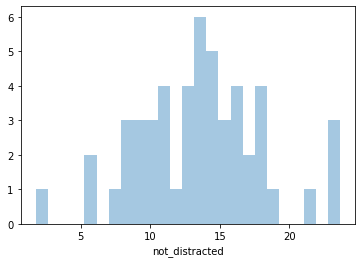

In [3]:
sns.distplot(crash_df['not_distracted'], kde=False, bins=25)


**Join Plot**

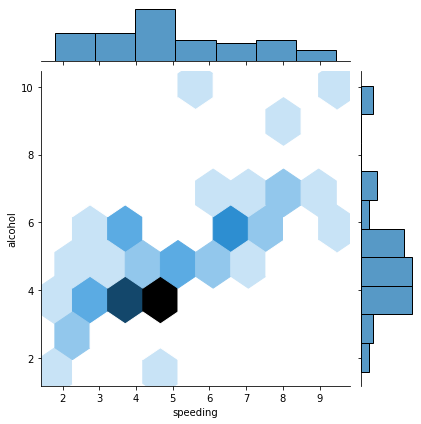

In [4]:
sns.jointplot(x='speeding', y='alcohol', data= crash_df, kind='hex')

**KDE Plot**

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

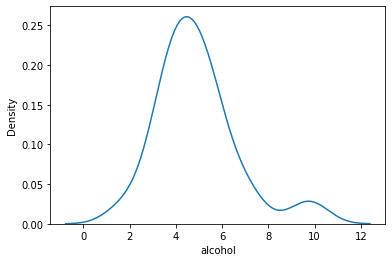

In [6]:
sns.kdeplot(crash_df['alcohol'])

**Pair Plot**

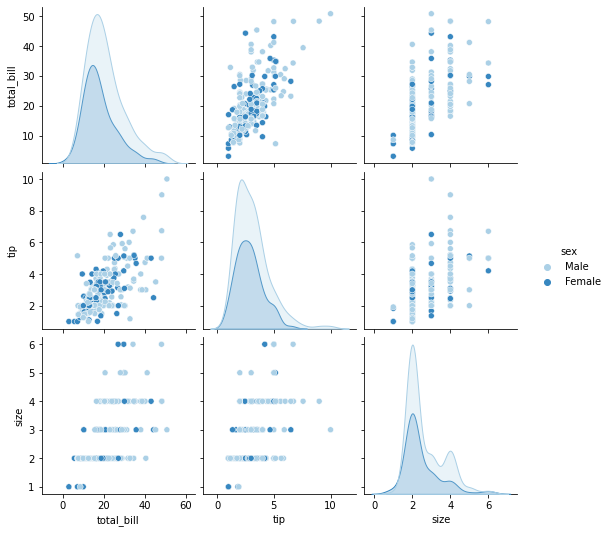

In [8]:
#sns.pairplot(crash_df)

tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='Blues')

**RUG Plot**

<AxesSubplot:xlabel='tip'>

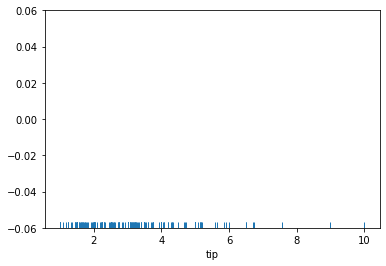

In [9]:
sns.rugplot(tips_df['tip'])

**Styling**

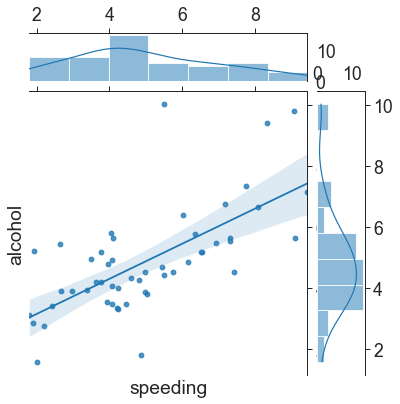

In [10]:
#sns style options white, whitegrid, darkgrid, dark, ticks

sns.set_style('ticks')

#set_context options paper, talk, poster

sns.set_context('paper', font_scale=2)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

#despine True = remove the line, False = Add the line

sns.despine(left=True, bottom=True, top=False, right=False)

# Categorical Plots

**BAR Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

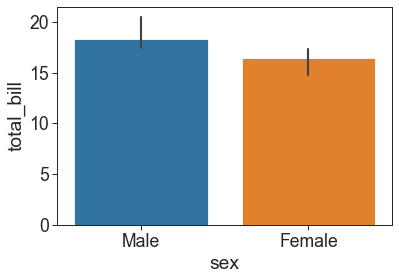

In [11]:
# estimator is by default mean, Median= np.median, std = np.std, var, cov= covariance

sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

**Count Plot**

<AxesSubplot:xlabel='sex', ylabel='count'>

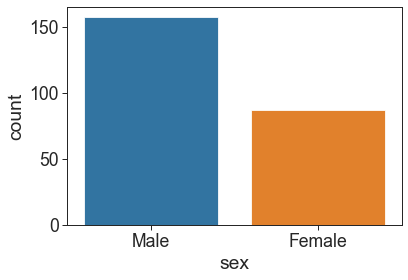

In [12]:
sns.countplot(x='sex', data=tips_df)

**Box Plot**

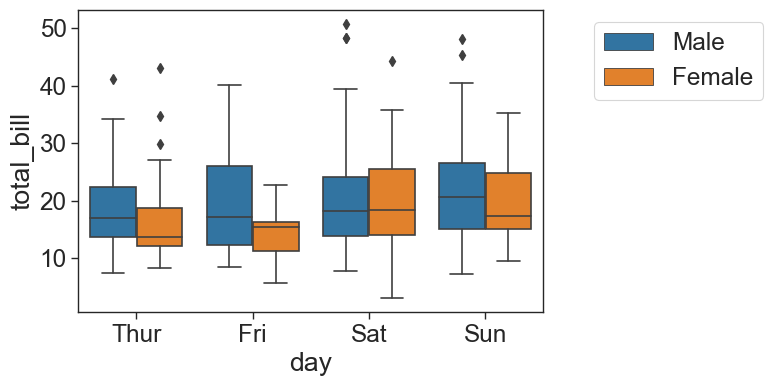

In [13]:
sns.set_context(font_scale=1)

plt.figure(figsize=(6,4), dpi=100)

sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc='upper right', bbox_to_anchor= (1.5, 1))

**Violin Plot**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

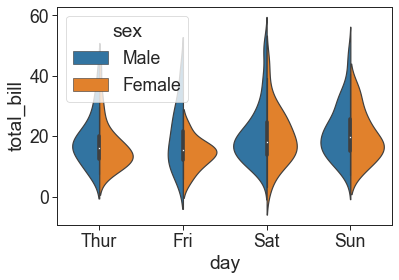

In [14]:
sns.violinplot(x='day', y= 'total_bill', data=tips_df, hue='sex', split=True)

**Strip Plot**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

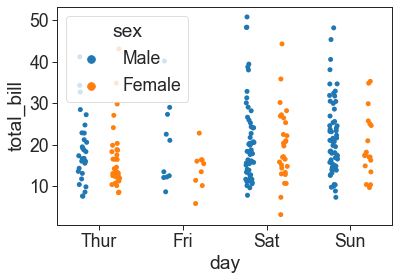

In [15]:
sns.stripplot(x='day', y='total_bill', data=tips_df,jitter=True, hue='sex', dodge=True)

**Swarm Plot**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

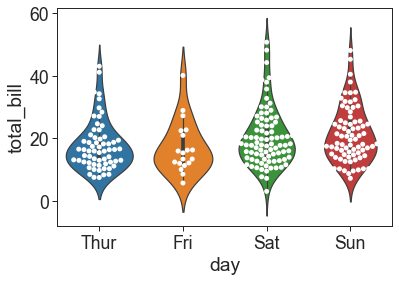

In [16]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

**Palette**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

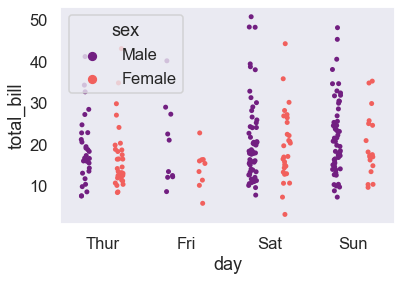

In [17]:
plt.figure(figsize=(6,4))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', dodge=True, palette='magma')


# Matrix Plot

**HeatMaps**

<AxesSubplot:>

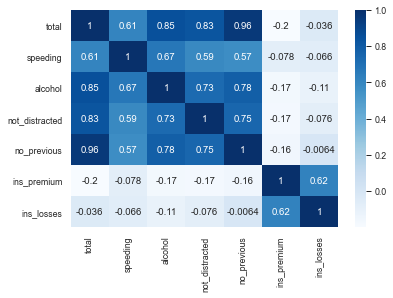

In [18]:
sns.set_context('paper')

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

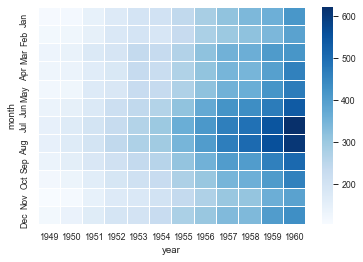

In [19]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index= 'month', columns='year', values='passengers')

sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1)

**Cluster Map**

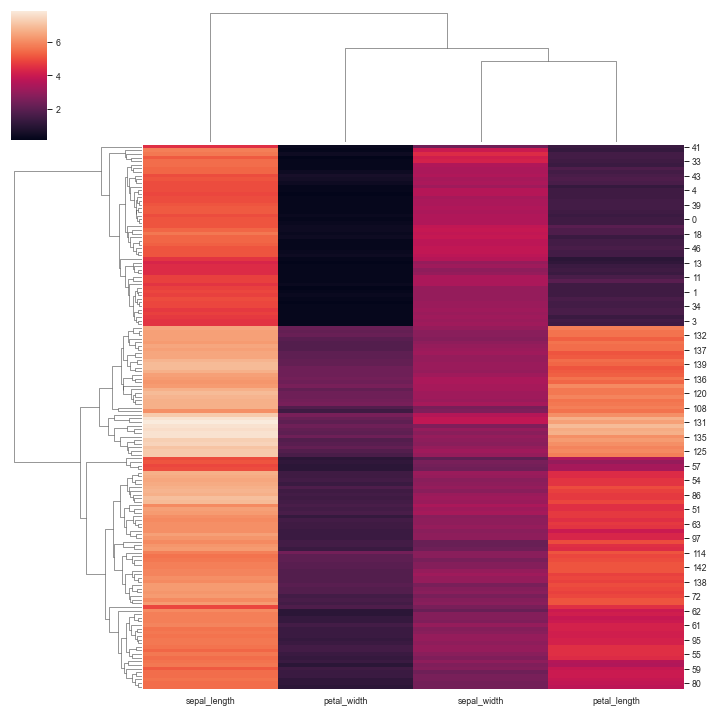

In [20]:
iris = sns.load_dataset('iris')

species = iris.pop('species')
sns.clustermap(iris)

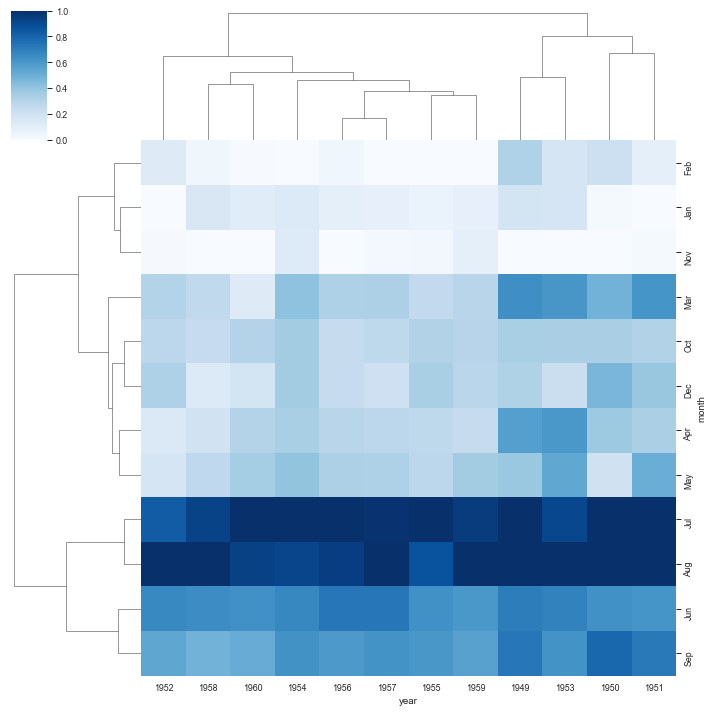

In [21]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

**Pair Grid**

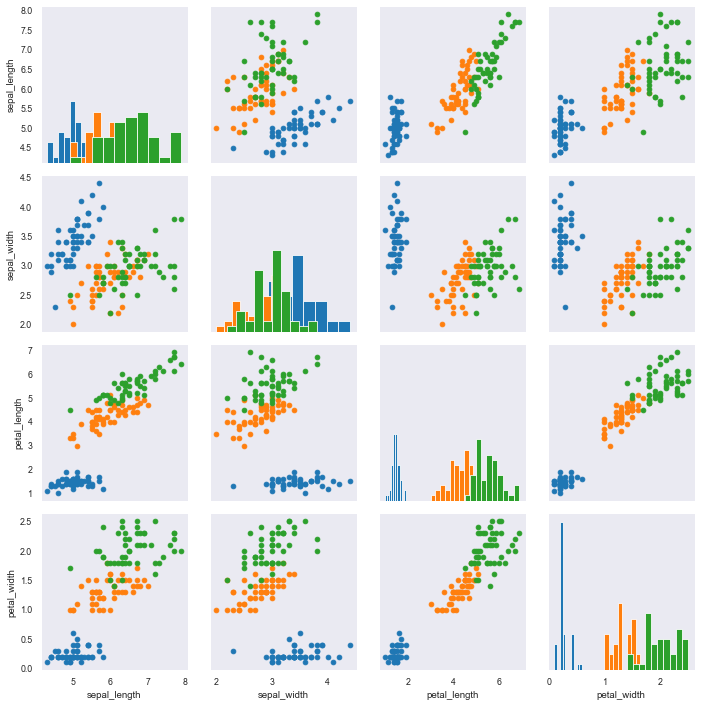

In [25]:
#instead of diag, can do upper and lower and others as well

iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

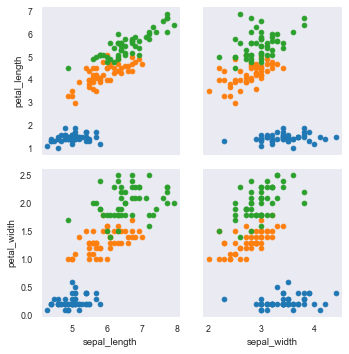

In [26]:
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'sepal_width'],
y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g

**Facet Grid**

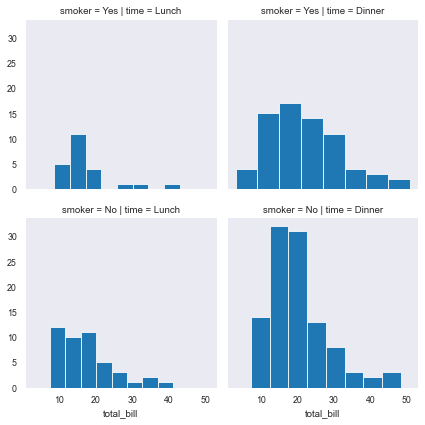

In [32]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8)

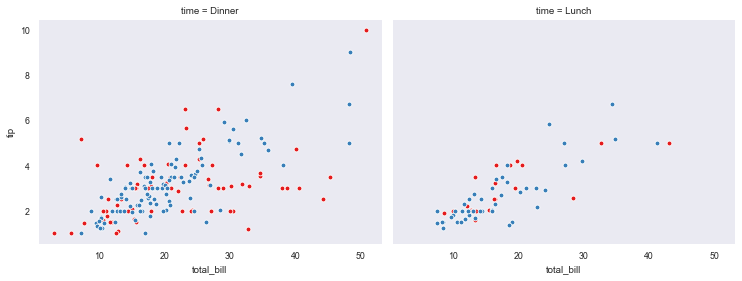

In [33]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

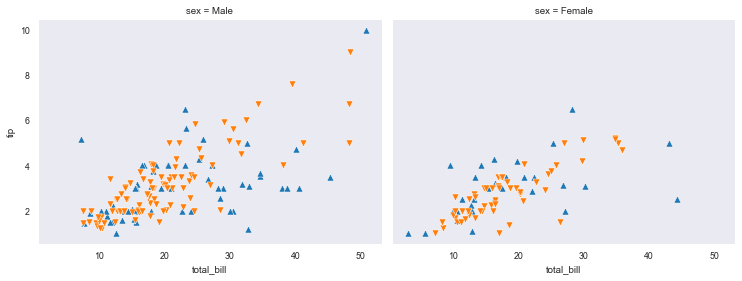

In [35]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
hue_order=['Yes', 'No'], hue_kws=dict(marker=['^', 'v']))

tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

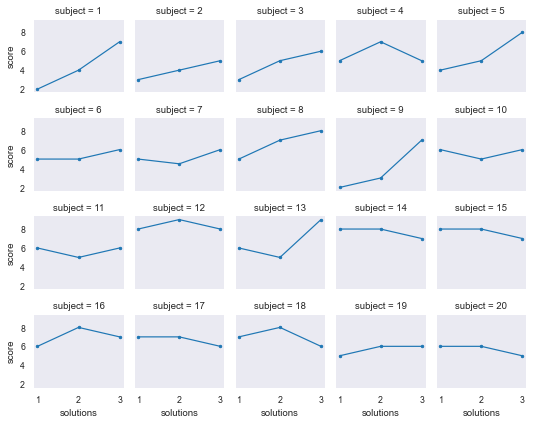

In [36]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

**Regression Plots**

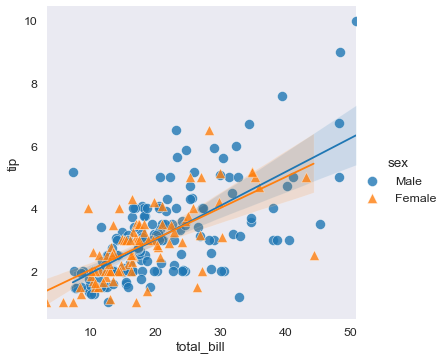

In [37]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'],
scatter_kws={'s':100, 'linewidth': 0.5, 'edgecolor': 'w'})

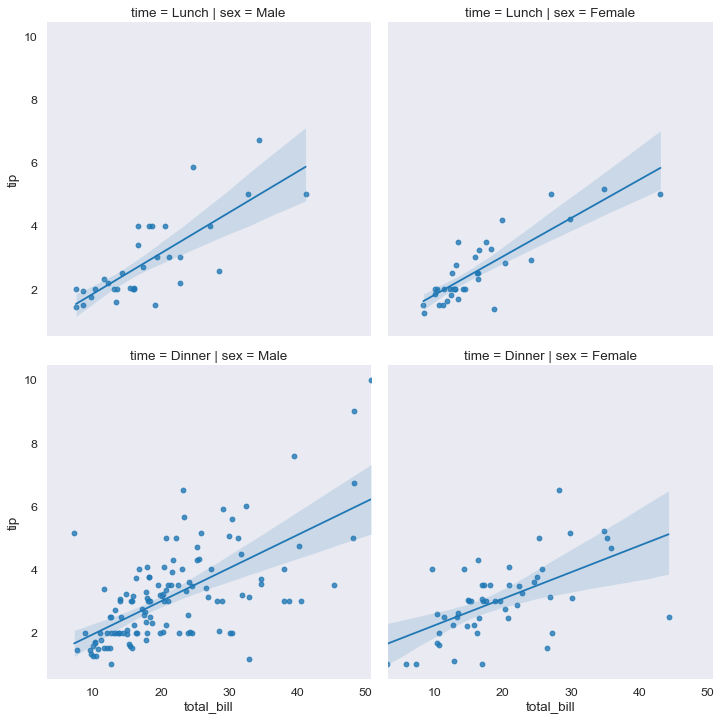

In [38]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)